### Downloading the Price datasets

#### Prices from Investing.com
BTC: https://www.investing.com/crypto/bitcoin/historical-data <br>
ETH: https://www.investing.com/crypto/ethereum/historical-data <br>
SOL: https://www.investing.com/crypto/solana/historical-data <br>
SNP500: https://www.investing.com/indices/us-spx-500-historical-data <br>
VIX: https://www.investing.com/indices/volatility-s-p-500-historical-data <br>
GOLD: https://www.investing.com/commodities/gold-historical-data

#### TVL from DeFi Lama
BTC: https://defillama.com/chain/Bitcoin <br>
ETH: https://defillama.com/chain/Ethereum <br>
SOL: https://defillama.com/chain/Solana

#### Wikipedia Page Views
ALL: https://pageviews.wmcloud.org/

### **DEPENDENCIES**

In [166]:
# Basic Stack 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib

# Changing the working directory
path = ('P:/6. DSMA/99. Thesis/Github/thesis')
os.chdir(path)

# Import the module
sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices
import camel
import sentiment_analyzer
importlib.reload(pipeline_crypto_prices)
importlib.reload(camel)
importlib.reload(sentiment_analyzer)

<module 'sentiment_analyzer' from 'P:\\6. DSMA/99. Thesis/Github/thesis/scripts\\sentiment_analyzer.py'>

### **RAW DATA**

##### 3. CRYPTO, INDEX, AND VIX

In [175]:
btc = get_prices(start_date='2018-01-01')
eth = get_prices('ETH-USD', start_date='2018-01-01')
sol = get_prices('SOL-USD', start_date='2018-01-01')
snp = get_prices('SNP', start_date='2018-01-01')
dow = get_prices('Dow', start_date='2018-01-01')
vix = get_prices('Vix', start_date='2018-01-01')


# Convert 'Date' columns to datetime format
btc['Date'] = pd.to_datetime(btc['Date'])
eth['Date'] = pd.to_datetime(eth['Date'])
sol['Date'] = pd.to_datetime(sol['Date'])
snp['Date'] = pd.to_datetime(snp['Date'])
dow['Date'] = pd.to_datetime(dow['Date'])
vix['Date'] = pd.to_datetime(vix['Date'])

Data for BTC-USD from 2018-01-01 to 2024-07-09 has been downloaded successfully
Data for ETH-USD from 2018-01-01 to 2024-07-09 has been downloaded successfully
Data for SOL-USD from 2018-01-01 to 2024-07-09 has been downloaded successfully
Data for SNP from 2018-01-01 to 2024-07-09 has been downloaded successfully
Data for Dow from 2018-01-01 to 2024-07-09 has been downloaded successfully
Data for Vix from 2018-01-01 to 2024-07-09 has been downloaded successfully


In [176]:
eth

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2.554270e+09
1,2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2.595760e+09
2,2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5.783350e+09
3,2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5.093160e+09
4,2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6.502860e+09
...,...,...,...,...,...,...,...
2377,2024-07-04,3291.817871,3309.203613,3054.521973,3054.521973,3054.521973,2.025251e+10
2378,2024-07-05,3057.833252,3106.152588,2826.014404,2981.598633,2981.598633,3.113194e+10
2379,2024-07-06,2981.988037,3080.107422,2957.395752,3069.377930,3069.377930,1.158629e+10
2380,2024-07-07,3067.405029,3072.814453,2923.959229,2929.387207,2929.387207,1.085795e+10


##### 2. GTRENDS AND WIKIPEDIA

1. Wikipedia
https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2018-01-01&end=2024-07-09&pages=Bitcoin|Solana|Ethereum|Cryptocurrency|Crypto|Blockchain#

2. Google Trends
https://trends.google.com/trends/explore?date=2024-01-01%202024-07-08&q=crypto&hl=en

Weekly: https://trends.google.com/trends/explore?date=2018-01-01%202024-07-09&q=crypto&hl=en

// Below code loads in all Google Trends Datasets, and the Wikipedia data set and merges them all together

In [15]:
#Gtrends Data
g_btc = pd.read_csv('data/raw/ext/btc_gtrends.csv', header=1)
g_btc.rename(columns={'bitcoin: (Worldwide)': 'BTC_Gtrends'}, inplace=True)
g_eth = pd.read_csv('data/raw/ext/eth_gtrends.csv', header=1)
g_eth.rename(columns={'ethereum: (Worldwide)': 'ETH_Gtrends'}, inplace=True)
g_sol = pd.read_csv('data/raw/ext/sol_gtrends.csv', header=1)
g_sol.rename(columns={'solana: (Worldwide)': 'SOL_Gtrends'}, inplace=True)
g_crypto = pd.read_csv('data/raw/ext/crypto_gtrends.csv', header=1)
g_crypto.rename(columns={'crypto: (Worldwide)': 'Crypto_Gtrends'}, inplace=True)

# Merging all trends data
all_gtrends = pd.merge(g_btc, g_eth, on='Day')
all_gtrends = pd.merge(all_gtrends, g_sol, on='Day')
all_gtrends = pd.merge(all_gtrends, g_crypto, on='Day')

# Wikipedia Data
wp = pd.read_csv('data/raw/ext/Wikipedia_Data.csv')

#Final External 
all_ext = pd.merge(wp, all_gtrends, left_on='Date', right_on='Day')
all_ext.drop(['Day'], axis=1, inplace=True)

# Apply percentage change to the columns
all_ext = camel.convert_to_percentage_change(all_ext, 'Date')
all_ext.Date = pd.to_datetime(all_ext.Date)
all_ext_pca = camel.pca_v2(all_ext, blacklist=['Date'], n_components=4, n_feat=7)
all_ext_pca['Date'] = all_ext['Date'].reset_index(drop=True)

In [178]:
wp = pd.read_csv('data/raw/ext/wp.csv')
wp

,Date,Bitcoin,Solana,Ethereum,Cryptocurrency,Crypto,Blockchain
0,2018-01-01,65416.0,7.0,6340.0,17025.0,61.0,17094.0
1,2018-01-02,85549.0,13.0,10701.0,26032.0,84.0,29727.0
2,2018-01-03,91452.0,23.0,11354.0,28094.0,75.0,30901.0
3,2018-01-04,86342.0,12.0,12828.0,31526.0,94.0,29282.0
4,2018-01-05,79232.0,14.0,12177.0,30220.0,87.0,27745.0
...,...,...,...,...,...,...,...
2376,2024-07-04,4231.0,17.0,1076.0,2895.0,27.0,1673.0
2377,2024-07-05,4547.0,12.0,1039.0,3093.0,28.0,1848.0
2378,2024-07-06,4101.0,13.0,1007.0,2290.0,25.0,1326.0
2379,2024-07-07,4243.0,23.0,1036.0,2326.0,26.0,1452.0


##### REDDIT SENTIMENT DATA

--__ Extra: https://www.aaii.com/sentimentsurvey/sent_results -> weekly historic sentiment figures

In [105]:
# Load in each dataset
btc_reddit = pd.read_csv('data/raw/reddit/BTC_R.csv')
eth_reddit = pd.read_csv('data/raw/reddit/ETH_R.csv')
sol_reddit = pd.read_csv('data/raw/reddit/SOL_R.csv')

#Merge
all_reddit = pd.concat([btc_reddit, eth_reddit, sol_reddit])
all_reddit.date_posted = pd.to_datetime(all_reddit.date_posted, utc=True)
all_reddit['date_posted'] = all_reddit['date_posted'].dt.strftime('%m/%d/%Y')
all_reddit.date_posted = pd.to_datetime(all_reddit.date_posted)

all_reddit = sentiment_analyzer.main(all_reddit)
all_reddit.to_csv('data/processed/all_reddit_sen.csv')
all_reddit

Processing data...


Analyzing Sentiment: 100%|██████████| 44568/44568 [00:13<00:00, 3190.30it/s]

Overall weighted average sentiment score: 0.1399


,date,weighted_mean_sentiment,unweighted_mean_sentiment,ups
0,2019-07-26,-0.128000,-0.128000,100721
1,2019-07-27,-0.128000,-0.128000,13473
2,2023-06-09,0.717527,0.849829,3592
3,2023-09-06,0.999400,0.999400,2875
4,2024-01-03,-0.261867,-0.182417,6
...,...,...,...,...
163,2024-07-04,0.096209,0.211242,19861
164,2024-07-05,-0.055920,0.291212,20037
165,2024-07-06,0.365589,0.205016,11541
166,2024-07-07,0.233182,0.234392,5081


In [172]:
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,42265.187500,1.639750e+10
1,2024-01-01,42280.234375,44175.437500,42214.976563,44167.332031,44167.332031,1.842698e+10
2,2024-01-02,44187.140625,45899.707031,44176.949219,44957.968750,44957.968750,3.933527e+10
3,2024-01-03,44961.601563,45503.242188,40813.535156,42848.175781,42848.175781,4.634232e+10
4,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,3.044809e+10
...,...,...,...,...,...,...,...
186,2024-07-04,60147.136719,60399.675781,56777.804688,56977.703125,56977.703125,4.114961e+10
187,2024-07-05,57022.808594,57497.152344,53717.375000,56662.375000,56662.375000,5.541754e+10
188,2024-07-06,56659.074219,58472.546875,56038.960938,58303.539063,58303.539063,2.061032e+10
189,2024-07-07,58239.429688,58371.121094,55793.324219,55849.109375,55849.109375,2.055336e+10


### **PROCESSING DATA**

##### 1. TECHNICAL ANALYSIS & PCA

**Input:** 
1. BTC, ETH, and SOL Price Data

**Output:** 
1. Dataframe with all technical indicators for all cryptos condensed to 4 columns
2. Seperate dataframe per crypto with its own Technical Indicators and Trend Determinisitc Technical Indicators


In [179]:
# Make a copy of the dataframe to avoid modifying the original
btc_1 = btc.copy()
eth_1 = eth.copy()
sol_1 = sol.copy()

# Apply technical analysis
btc_1 = camel.technical_analysis(btc, price_col = 'Close')
eth_1 = camel.technical_analysis(eth, price_col = 'Close')
sol_1 = camel.technical_analysis(sol, price_col = 'Close')

# Convert into percentages and keep distinct columns only
btc_blacklist = ['Date', 'Close','return','Open', 'High', 'Low','MA_td', '3MA_td', '%K_td',  '%D_td', 'RSI_td','Momentum_td', 'MACD_td','CCI_td', 'BB_td', 'ATR_td']
btc_1 = camel.convert_to_percentage_change(btc_1, blacklist_columns=btc_blacklist)
btc_1 = btc_1[['Date','Close','return' ,'Volume', 'MA',
       'MA_td', '3MA', '3MA_td', '%K', '%K_td', '%D', '%D_td', 'RSI', 'RSI_td',
       'Momentum', 'Momentum_td', 'EMA12', 'EMA26', 'MACD', 'Signal',
       'MACD_td', 'TP', 'SMA_TP', 'MD', 'CCI', 'CCI_td', '20D_SMA', '20D_STD',
       'Upper_BB', 'Lower_BB', 'BB_td', 'TR', 'ATR', 'ATR_td']]

eth_1 = camel.convert_to_percentage_change(eth_1, blacklist_columns=btc_blacklist)
eth_1 = eth_1[['Date','Close','return' ,'Volume', 'MA',
       'MA_td', '3MA', '3MA_td', '%K', '%K_td', '%D', '%D_td', 'RSI', 'RSI_td',
       'Momentum', 'Momentum_td', 'EMA12', 'EMA26', 'MACD', 'Signal',
       'MACD_td', 'TP', 'SMA_TP', 'MD', 'CCI', 'CCI_td', '20D_SMA', '20D_STD',
       'Upper_BB', 'Lower_BB', 'BB_td', 'TR', 'ATR', 'ATR_td']]

sol_1 = camel.convert_to_percentage_change(sol_1, blacklist_columns=btc_blacklist)
sol_1 = sol_1[['Date','Close','return' ,'Volume', 'MA',
       'MA_td', '3MA', '3MA_td', '%K', '%K_td', '%D', '%D_td', 'RSI', 'RSI_td',
       'Momentum', 'Momentum_td', 'EMA12', 'EMA26', 'MACD', 'Signal',
       'MACD_td', 'TP', 'SMA_TP', 'MD', 'CCI', 'CCI_td', '20D_SMA', '20D_STD',
       'Upper_BB', 'Lower_BB', 'BB_td', 'TR', 'ATR', 'ATR_td']]

# Apply first PCA per dataset
btc_pca = camel.pca_v2(btc_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
eth_pca = camel.pca_v2(eth_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
sol_pca = camel.pca_v2(sol_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)

# Apply another round of PCA for combined database.
btc_pca['Date'] = btc_1['Date'].reset_index(drop=True)
eth_pca['Date'] = eth_1['Date'].reset_index(drop=True)
sol_pca['Date'] = sol_1['Date'].reset_index(drop=True)

#Merge all and add suffixes
btc_pca = btc_pca.rename(columns={'PC1': 'PC1_btc', 'PC2': 'PC2_btc', 'PC3': 'PC3_btc', 'PC4': 'PC4_btc'})
eth_pca = eth_pca.rename(columns={'PC1': 'PC1_eth', 'PC2': 'PC2_eth', 'PC3': 'PC3_eth', 'PC4': 'PC4_eth'})
sol_pca = sol_pca.rename(columns={'PC1': 'PC1_sol', 'PC2': 'PC2_sol', 'PC3': 'PC3_sol', 'PC4': 'PC4_sol'})

pca = pd.merge(btc_pca, eth_pca, on='Date')
pca = pd.merge(pca, sol_pca, on='Date')

pca = camel.pca_v2(pca, blacklist=['Date'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
## This dataset has full technical indicators compressed into 4 variables with 77% explained

pca['Date'] = btc_1['Date'].reset_index(drop=True)

pca

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [32] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [32] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Column labels are auto-completed.
[pca] >Row labels are aut

,PC1,PC2,PC3,PC4,Date
0,5.495878,0.415387,1.224377,1.616684,2018-01-30
1,1.875486,-1.021937,-1.483979,0.643895,2018-01-31
2,-0.155439,-1.072399,-0.947251,0.182680,2018-02-01
3,-0.944249,-0.346590,0.782909,0.489882,2018-02-02
4,-2.478660,-0.009248,0.781922,0.617041,2018-02-03
...,...,...,...,...,...
1505,3.398326,-0.503261,1.143631,-0.051703,2022-03-18
1506,3.721016,-1.485207,0.034052,-2.414829,2022-03-19
1507,-1.937776,-1.734643,0.731469,-0.866197,2022-03-20
1508,1.296778,-1.859323,0.591257,-1.306717,2022-03-21


In [187]:
wp.Date = pd.to_datetime(wp.Date, utc=True)
btc_1.Date = pd.to_datetime(btc_1.Date, utc=True)
btc_1 = pd.merge(btc_1, wp, left_on='Date', right_on='Date')

In [189]:
btc_1

,Date,Close,return,Volume,MA,MA_td,3MA,3MA_td,%K,%K_td,...,BB_td,TR,ATR,ATR_td,Bitcoin,Solana,Ethereum,Cryptocurrency,Crypto,Blockchain
0,2018-01-30 00:00:00+00:00,10106.299805,-0.105352,0.215340,-0.024368,0,-0.010138,0,-0.937530,0,...,0,0.825102,-0.127797,1,39961.0,16.0,7102.0,15886.0,61.0,25439.0
1,2018-01-31 00:00:00+00:00,10221.099609,0.011359,-0.069080,-0.012332,0,-0.008690,0,6.998581,1,...,0,-0.524642,-0.103027,0,44012.0,21.0,7295.0,16237.0,416.0,24301.0
2,2018-02-01 00:00:00+00:00,9170.540039,-0.102783,0.238553,-0.015944,0,-0.014826,0,-0.433951,0,...,0,1.443842,0.021420,1,47413.0,6.0,7259.0,18365.0,60.0,26612.0
3,2018-02-02 00:00:00+00:00,8830.750000,-0.037052,0.277878,-0.018749,0,-0.016495,0,1.195896,1,...,1,-0.088539,0.035325,1,52986.0,13.0,6668.0,17443.0,71.0,24654.0
4,2018-02-03 00:00:00+00:00,9174.910156,0.038973,-0.429257,-0.020484,0,-0.016914,0,0.332760,1,...,0,-0.123845,-0.017394,1,44264.0,12.0,5381.0,12769.0,57.0,18095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2024-07-04 00:00:00+00:00,56977.703125,-0.053116,0.382869,-0.005379,0,-0.006942,0,-0.905987,0,...,1,0.308330,0.065981,1,4231.0,17.0,1076.0,2895.0,27.0,1673.0
2340,2024-07-05 00:00:00+00:00,56662.375000,-0.005534,0.346733,-0.008428,0,-0.007417,0,9.250534,1,...,1,0.043598,0.076931,1,4547.0,12.0,1039.0,3093.0,28.0,1848.0
2341,2024-07-06 00:00:00+00:00,58303.539063,0.028964,-0.628090,-0.004145,0,-0.006453,0,0.557271,1,...,0,-0.356156,0.062693,1,4101.0,13.0,1007.0,2290.0,25.0,1326.0
2342,2024-07-07 00:00:00+00:00,55849.109375,-0.042097,-0.002764,-0.009553,0,-0.007038,0,-0.535181,0,...,0,0.059259,0.039589,1,4243.0,23.0,1036.0,2326.0,26.0,1452.0


In [133]:
# All Datasets
all_reddit.date = pd.to_datetime(all_reddit.date)
pca.Date = pd.to_datetime(pca.Date)
all_ext_pca.Date = pd.to_datetime(all_ext_pca.Date)

all_reddit

all = pd.merge(all_reddit, pca, left_on='date', right_on='Date')
all = pd.merge(all, all_ext_pca, left_on='date', right_on='Date')
all

solana_price = sol[['Date','Close']]

all = pd.merge(all, solana_price, left_on='date', right_on='Date')
all = all.drop(['Date_x','Date_y','Date','ups', 'unweighted_mean_sentiment'], axis=1)
all['Tomorrow'] = all.Close.shift(-1)
all['Up'] = np.where(all.Tomorrow > all.Close, 1, 0)
all = all.drop(['Tomorrow','Close'], axis=1)
all = all.dropna()
all

all.to_csv('data/processed/camel_v1_sol.csv', index=False)

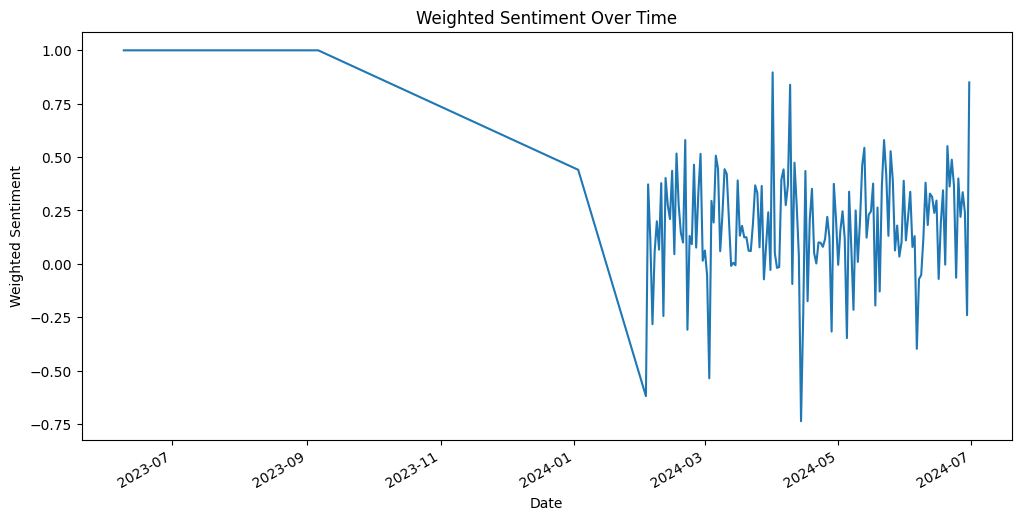

In [4]:
extt = btc.copy()
extt = extt.dropna()
# Convert 'Date' column to datetime
extt['Date'] = pd.to_datetime(extt['Date'])

# Set 'Date' as the index
extt.set_index('Date', inplace=True)

# Plot 'weighted_sentiment' with 'Date' as x-axis
plt.figure(figsize=(12, 6))  # Set the figure size to make the plot wider
extt['weighted_sentiment'].plot()
plt.xlabel('Date')
plt.ylabel('Weighted Sentiment')
plt.title('Weighted Sentiment Over Time')
plt.show()

#### Adding the TVL Data

In [8]:
btc_tvl = pd.read_csv('data/tvl/btc_tvl.csv')
eth_tvl = pd.read_csv('data/tvl/eth_tvl.csv')
sol_tvl = pd.read_csv('data/tvl/sol_tvl.csv')

def tvl_pro(df):
    df = df[:1]
    df = df.melt(var_name='Date', value_name='TVL')
    df = df.drop(index=0).reset_index(drop=True)
    df.Date = pd.to_datetime(df.Date, dayfirst=True)
    return df

btc_tvl, eth_tvl, sol_tvl = tvl_pro(btc_tvl), tvl_pro(eth_tvl), tvl_pro(sol_tvl)

btc, eth, sol = pd.merge(btc, btc_tvl, on='Date', how='left'), pd.merge(eth, eth_tvl, on='Date', how='left'), pd.merge(sol, sol_tvl, on='Date', how='left')

btc


,Date,Price,Change %,Open,High,Low,Volume,date_posted,weighted_sentiment,Wikipedia_Views,Google_Trends,TVL
0,2024-01-01,44183.4,0.0452,42272.5,44187.0,42196.7,36300.0,NaT,NaN,6371,32.0,305849557.651015
1,2024-01-02,44943.7,0.0172,44182.9,45885.4,44166.0,97840.0,NaT,NaN,9267,50.0,316328729.58009
2,2024-01-03,42836.1,-0.0469,44943.7,45492.7,40888.3,117650.0,2024-01-03,0.440400,15761,53.0,325693087.810681
3,2024-01-04,44157.0,0.0308,42836.1,44744.5,42632.8,68050.0,NaT,NaN,9113,42.0,309519348.463304
4,2024-01-05,44156.9,0.0000,44163.0,44312.1,42629.0,68070.0,NaT,NaN,7212,43.0,319142424.024755
...,...,...,...,...,...,...,...,...,...,...,...,...
176,2024-06-25,61809.4,0.0252,60292.0,62266.0,60262.2,77280.0,2024-06-25,0.399863,4558,32.0,1001518353.133826
177,2024-06-26,60849.4,-0.0155,61809.9,62469.4,60715.1,54950.0,2024-06-26,0.220186,4297,27.0,1035170175.628397
178,2024-06-27,61685.3,0.0137,60848.3,62351.2,60629.4,48790.0,2024-06-27,0.335465,4327,25.0,1015541216.646057
179,2024-06-28,60403.3,-0.0208,61684.6,62175.4,60081.9,58950.0,2024-06-28,0.241396,3687,26.0,1025230736.409645


#### Proccess Gold, SNP, and VIX Data

In [9]:
gold = pd.read_csv('data/price/gold.csv')
snp = pd.read_csv('data/price/snp.csv')
vix = pd.read_csv('data/price/vix.csv')

gold.Date, snp.Date, vix.Date = pd.to_datetime(gold.Date), pd.to_datetime(snp.Date), pd.to_datetime(vix.Date)

# 2. Applying the Comma function on Prices
gold.Price, snp.Price = comma_form(gold.Price), comma_form(snp.Price)
gold.Open, snp.Open = comma_form(gold.Open), comma_form(snp.Open)
gold.High, snp.High = comma_form(gold.High), comma_form(snp.High)
gold.Low, snp.Low= comma_form(gold.Low), comma_form(snp.Low)

# 3. Renaming Volume and applying fomatting
gold['Volume'], snp['Volume']= gold['Vol.'], snp['Vol.']
gold.Volume, snp.Volume = gold.Volume.apply(convert_volume), snp.Volume.apply(convert_volume)

# 4. Applying the PCT Change Column
gold['Change %'], snp['Change %'], vix['Change %']  = percent(gold['Change %']), percent(snp['Change %']), percent(vix['Change %'])
gold['pct_change'], snp['pct_change'], vix['pct_change'] = gold['Change %'], snp['Change %'], vix['Change %']

# 5. Deleting old formatted columns
gold, snp, vix = gold.drop(['Vol.', 'Change %'], axis = 1), snp.drop(['Vol.', 'Change %'], axis = 1), vix.drop(['Vol.', 'Change %'], axis = 1)

###### A function to fill in missing dates in Gold, SNP, and VIX prices from the previous column. This is because on the weekends the markets are closed

In [10]:
# Fill missing dates and prices
def fill_missing_data(df):
    # Convert 'Date' to datetime
    df['Date'] = pd.to_datetime(df['Date'])

# Set the date as the index
    df.set_index('Date', inplace=True)

# Create a date range from the min to the max date in the DataFrame
    date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Reindex the DataFrame to the new date range
    df = df.reindex(date_range)

# Fill missing values by propagating the last valid observation forward
    df.fillna(method='ffill', inplace=True)

# Reset the index to get the date column back
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Date'}, inplace=True)
    
    return df

gold, snp, vix = fill_missing_data(gold), fill_missing_data(snp), fill_missing_data(vix)
gold

,Date,Price,Open,High,Low,Volume,pct_change
0,2023-01-16,1909.9,1923.8,1931.8,1906.2,268370.0,-0.0061
1,2023-01-17,1909.9,1923.8,1931.8,1906.2,268370.0,-0.0061
2,2023-01-18,1907.0,1911.1,1929.8,1898.6,218970.0,-0.0015
3,2023-01-19,1923.9,1907.0,1936.9,1902.0,214250.0,0.0089
4,2023-01-20,1928.2,1933.7,1939.0,1922.0,165270.0,0.0022
...,...,...,...,...,...,...,...
525,2024-06-24,2332.4,2322.1,2334.7,2318.0,600.0,0.0057
526,2024-06-25,2318.4,2334.4,2336.2,2314.8,1260.0,-0.0060
527,2024-06-26,2301.0,2318.8,2320.5,2292.9,990.0,-0.0075
528,2024-06-27,2336.6,2309.4,2342.0,2306.8,140230.0,0.0155


#### Merging Gold, SNP, and VIX Datatables

In [11]:
ext = pd.merge(gold, snp, on='Date')
ext = pd.merge(ext, vix, on='Date')

# Assuming df is your DataFrame
ext.rename(columns={
    'Price_x': 'Gold_Price',
    'Open_x': 'Gold_Open',
    'High_x': 'Gold_High',
    'Low_x': 'Gold_Low',
    'Volume_x': 'Gold_Volume',
    'pct_change_x': 'Gold_pct_change',
    'Price_y': 'SNP_Price',
    'Open_y': 'SNP_Open',
    'High_y': 'SNP_High',
    'Low_y': 'SNP_Low',
    'Volume_y': 'SNP_Volume',
    'pct_change_y': 'SNP_pct_change',
    'Price': 'VIX_Price',
    'Open': 'VIX_Open',
    'High': 'VIX_High',
    'Low': 'VIX_Low',
    'pct_change': 'VIX_pct_change'
}, inplace=True)

##### Creating the 'tomorrow' independent variable

In [12]:
def tomorrow(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date', ascending=False)
    df['Tomorrow'] = df.Price.shift(1)
    df['Tomorrow'] = (df.Tomorrow > df.Price).astype(int)
    return df

btc, eth, sol = tomorrow(btc), tomorrow(eth), tomorrow(sol)

In [13]:
btc

,Date,Price,Change %,Open,High,Low,Volume,date_posted,weighted_sentiment,Wikipedia_Views,Google_Trends,TVL,Tomorrow
180,2024-06-29,60973.4,0.0094,60403.7,61192.8,60382.8,26560.0,2024-06-29,-0.239932,3549,22.0,1004196509.156641,0
179,2024-06-28,60403.3,-0.0208,61684.6,62175.4,60081.9,58950.0,2024-06-28,0.241396,3687,26.0,1025230736.409645,1
178,2024-06-27,61685.3,0.0137,60848.3,62351.2,60629.4,48790.0,2024-06-27,0.335465,4327,25.0,1015541216.646057,0
177,2024-06-26,60849.4,-0.0155,61809.9,62469.4,60715.1,54950.0,2024-06-26,0.220186,4297,27.0,1035170175.628397,1
176,2024-06-25,61809.4,0.0252,60292.0,62266.0,60262.2,77280.0,2024-06-25,0.399863,4558,32.0,1001518353.133826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-01-05,44156.9,0.0000,44163.0,44312.1,42629.0,68070.0,NaT,NaN,7212,43.0,319142424.024755,0
3,2024-01-04,44157.0,0.0308,42836.1,44744.5,42632.8,68050.0,NaT,NaN,9113,42.0,309519348.463304,0
2,2024-01-03,42836.1,-0.0469,44943.7,45492.7,40888.3,117650.0,2024-01-03,0.440400,15761,53.0,325693087.810681,1
1,2024-01-02,44943.7,0.0172,44182.9,45885.4,44166.0,97840.0,NaT,NaN,9267,50.0,316328729.58009,0


##### Join Gold, SNP, and VIX to Crypto Price Dataset

In [15]:
def join_other(df):
    df = pd.merge(df, ext, on='Date', how='left')
    return df
btc_1, eth_1, sol_1 = join_other(btc), join_other(eth), join_other(sol)
btc_1, eth_1, sol_1 = btc_1.sort_values(by='Date').reset_index(drop=True), eth_1.sort_values(by='Date').reset_index(drop=True), sol_1.sort_values(by='Date').reset_index(drop=True)

In [16]:
btc_1

,Date,Price,Change %,Open,High,Low,Volume,date_posted,weighted_sentiment,Wikipedia_Views,...,SNP_Open,SNP_High,SNP_Low,SNP_Volume,SNP_pct_change,VIX_Price,VIX_Open,VIX_High,VIX_Low,VIX_pct_change
0,2024-01-01,44183.4,0.0452,42272.5,44187.0,42196.7,36300.0,NaT,NaN,6371,...,4782.88,4788.43,4751.99,NaN,-0.0028,12.45,12.55,13.19,12.36,-0.0016
1,2024-01-02,44943.7,0.0172,44182.9,45885.4,44166.0,97840.0,NaT,NaN,9267,...,4745.20,4754.33,4722.67,NaN,-0.0057,13.20,13.22,14.23,13.10,0.0602
2,2024-01-03,42836.1,-0.0469,44943.7,45492.7,40888.3,117650.0,2024-01-03,0.440400,15761,...,4725.07,4729.29,4699.71,NaN,-0.0080,14.04,13.35,14.22,13.33,0.0636
3,2024-01-04,44157.0,0.0308,42836.1,44744.5,42632.8,68050.0,NaT,NaN,9113,...,4697.42,4726.78,4687.53,NaN,-0.0034,14.13,13.93,14.20,13.64,0.0064
4,2024-01-05,44156.9,0.0000,44163.0,44312.1,42629.0,68070.0,NaT,NaN,7212,...,4690.57,4721.49,4682.11,NaN,0.0018,13.35,14.24,14.58,13.29,-0.0552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2024-06-25,61809.4,0.0252,60292.0,62266.0,60262.2,77280.0,2024-06-25,0.399863,4558,...,5460.73,5472.88,5446.56,NaN,0.0039,12.84,13.48,13.52,12.84,-0.0368
177,2024-06-26,60849.4,-0.0155,61809.9,62469.4,60715.1,54950.0,2024-06-26,0.220186,4297,...,5460.71,5483.14,5451.87,NaN,0.0016,12.55,12.81,13.24,12.37,-0.0226
178,2024-06-27,61685.3,0.0137,60848.3,62351.2,60629.4,48790.0,2024-06-27,0.335465,4327,...,5473.59,5490.81,5467.54,NaN,0.0009,12.24,12.69,12.77,12.21,-0.0247
179,2024-06-28,60403.3,-0.0208,61684.6,62175.4,60081.9,58950.0,2024-06-28,0.241396,3687,...,5488.48,5523.64,5451.12,NaN,-0.0041,12.44,12.24,12.76,11.87,0.0163


##### Function to create the technical indicators

In [17]:
def technical_analysis(df):
    # Create a copy of the input DataFrame
    ta = df.copy()
    
    # 10D MA
    ta['MA'] = ta.Price.rolling(window=10).mean()
    ta['MA_td'] = (ta.Price > ta.MA).astype(int)
    
    # 30D MA
    ta['3MA'] = ta.Price.rolling(window=30).mean()
    ta['3MA_td'] = (ta.Price > ta['3MA']).astype(int)
    
    # %K
    lowest_low = ta.Low.rolling(window=10).min()
    highest_high = ta.High.rolling(window=10).max()
    ta['%K'] = (ta.Price - lowest_low) / (highest_high - lowest_low) * 100
    ta['%K_td'] = (ta['%K'] > ta['%K'].shift(1)).astype(int)
    
    # Calculate %D
    ta['%D'] = ta['%K'].rolling(window=3).mean()
    ta['%D_td'] = (ta['%D'] > ta['%D'].shift(1)).astype(int)
    
    # RSI 
    delta = ta.Price.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    ta['RSI'] = 100 - (100 / (1 + rs))
    
    def RSI_td(rsi_values):
        if rsi_values >= 70:
            return -1
        elif rsi_values <= 30:
            return 1
        else:
            return 0
    
    ta['RSI_td'] = ta.RSI.apply(RSI_td)
    
    # Momentum 
    momentum_window = 10 
    ta['Momentum'] = ta.Price - ta.Price.shift(momentum_window)
    ta['Momentum_td'] = (ta.Momentum > 1).astype(int)
    
    # MACD 12,26,9
    ta['EMA12'] = ta.Price.ewm(span=12, adjust=False).mean()
    ta['EMA26'] = ta.Price.ewm(span=26, adjust=False).mean()
    ta['MACD'] = ta['EMA12'] - ta['EMA26']
    ta['Signal'] = ta['MACD'].ewm(span=9, adjust=False).mean()
    ta['MACD_td'] = (ta['MACD'] > ta['MACD'].shift(1)).astype(int)
    
    # CCI
    ta['TP'] = (ta['High'] + ta['Low'] + ta['Price']) / 3
    
    # Calculate the 20-period Simple Moving Average of the Typical Price
    ta['SMA_TP'] = ta['TP'].rolling(window=20).mean()
    
    def calculate_md(series):
        return abs(series - series.mean()).mean()
    
    ta['MD'] = ta['TP'].rolling(window=20).apply(calculate_md)
    
    # Calculate the CCI
    ta['CCI'] = (ta['TP'] - ta['SMA_TP']) / (0.015 * ta['MD'])
    
    def CCI_td(CCI_values):
        if CCI_values >= 100:
            return -1
        elif CCI_values <= -100:
            return 1
        else:
            return 0
    
    ta['CCI_td'] = ta.CCI.apply(CCI_td)

    ta = ta[['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change %','TVL', 'weighted_sentiment',
       'Tomorrow', 'Gold_Price', 'Gold_Open', 'Gold_High', 'Gold_Low',
       'Gold_Volume', 'Gold_pct_change', 'SNP_Price', 'SNP_Open', 'SNP_High',
       'SNP_Low', 'SNP_Volume', 'SNP_pct_change', 'VIX_Price', 'VIX_Open',
       'VIX_High', 'VIX_Low', 'VIX_pct_change','MA_td','3MA_td',
       '%K_td','%D_td','RSI_td',
       'Momentum_td','MACD_td','CCI_td','Wikipedia_Views','Google_Trends']]

    return ta

In [18]:
#btcc, ethh, soll = technical_analysis(btc_1), technical_analysis(eth_1), technical_analysis(sol_1)
btcc = technical_analysis(btc_1)

Sample Dataset for BTC

In [19]:
btcc

,Date,Price,Open,High,Low,Volume,Change %,TVL,weighted_sentiment,Tomorrow,...,MA_td,3MA_td,%K_td,%D_td,RSI_td,Momentum_td,MACD_td,CCI_td,Wikipedia_Views,Google_Trends
0,2024-01-01,44183.4,42272.5,44187.0,42196.7,36300.0,0.0452,305849557.651015,NaN,1,...,0,0,0,0,0,0,0,0,6371,32.0
1,2024-01-02,44943.7,44182.9,45885.4,44166.0,97840.0,0.0172,316328729.58009,NaN,0,...,0,0,0,0,0,0,1,0,9267,50.0
2,2024-01-03,42836.1,44943.7,45492.7,40888.3,117650.0,-0.0469,325693087.810681,0.440400,1,...,0,0,0,0,0,0,0,0,15761,53.0
3,2024-01-04,44157.0,42836.1,44744.5,42632.8,68050.0,0.0308,309519348.463304,NaN,0,...,0,0,0,0,0,0,1,0,9113,42.0
4,2024-01-05,44156.9,44163.0,44312.1,42629.0,68070.0,0.0000,319142424.024755,NaN,0,...,0,0,0,0,0,0,1,0,7212,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2024-06-25,61809.4,60292.0,62266.0,60262.2,77280.0,0.0252,1001518353.133826,0.399863,0,...,0,0,1,1,1,0,0,1,4558,32.0
177,2024-06-26,60849.4,61809.9,62469.4,60715.1,54950.0,-0.0155,1035170175.628397,0.220186,1,...,0,0,0,1,1,0,0,1,4297,27.0
178,2024-06-27,61685.3,60848.3,62351.2,60629.4,48790.0,0.0137,1015541216.646057,0.335465,0,...,0,0,1,1,1,0,0,1,4327,25.0
179,2024-06-28,60403.3,61684.6,62175.4,60081.9,58950.0,-0.0208,1025230736.409645,0.241396,1,...,0,0,0,0,1,0,0,1,3687,26.0


### Finalize Model Dataset

In [20]:
model_b = btcc[['Tomorrow', 'Date', 'Price', 'Change %','Volume', 'TVL',
       'weighted_sentiment', 'Gold_Volume','Gold_pct_change', 'SNP_Price',
       'SNP_Volume', 'SNP_pct_change',
       'VIX_Price', 'VIX_pct_change',
       'MA_td', '3MA_td', '%K_td', '%D_td', 'RSI_td', 'Momentum_td', 'MACD_td',
       'CCI_td', 'Wikipedia_Views', 'Google_Trends']]

In [21]:
list = ['Volume', 'TVL','weighted_sentiment', 'Gold_Volume', 
       'SNP_Volume','VIX_pct_change','Wikipedia_Views', 'Google_Trends']

def calculate_percentage_change(df, column_names):
    for column in column_names:
        if column in df.columns:
            df[column + '_pct_change'] = df[column].pct_change() * 100
        else:
            print(f"Column '{column}' not found in DataFrame")
    return df

model_b = calculate_percentage_change(model_b, list)

C:\Users\mulle\AppData\Local\Temp\ipykernel_23432\2068560767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_pct_change'] = df[column].pct_change() * 100
C:\Users\mulle\AppData\Local\Temp\ipykernel_23432\2068560767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + '_pct_change'] = df[column].pct_change() * 100
C:\Users\mulle\AppData\Local\Temp\ipykernel_23432\2068560767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Saving the datasets for further proccessing 

In [22]:
model_b = model_b[['Tomorrow', 'Date', 'Price', 'Change %', 'Volume_pct_change',
       'Gold_pct_change', 'Gold_Volume_pct_change',
       'SNP_pct_change', 
       'VIX_pct_change', 'VIX_pct_change_pct_change',
        'Wikipedia_Views_pct_change', 'Google_Trends_pct_change',
        'TVL_pct_change', 'weighted_sentiment_pct_change',
       'MA_td', '3MA_td', '%K_td', '%D_td', 'RSI_td', 'Momentum_td', 'MACD_td', 'CCI_td']]

In [24]:
model_b.to_csv('data/model/btc_model_price.csv', index=False)
#ethh.to_csv('data/model/eth_model_price.csv')
#soll.to_csv('data/model/sol_model_price.csv')

In [25]:
model_b
model_b.to_csv('data/model/btc_model_price.csv', index=False)

In [23]:
model_b

,Tomorrow,Date,Price,Change %,Volume_pct_change,Gold_pct_change,Gold_Volume_pct_change,SNP_pct_change,VIX_pct_change,VIX_pct_change_pct_change,...,TVL_pct_change,weighted_sentiment_pct_change,MA_td,3MA_td,%K_td,%D_td,RSI_td,Momentum_td,MACD_td,CCI_td
0,1,2024-01-01,44183.4,0.0452,NaN,-0.0056,NaN,-0.0028,-0.0016,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
1,0,2024-01-02,44943.7,0.0172,169.531680,0.0008,49.035187,-0.0057,0.0602,-3862.500000,...,3.426250,NaN,0,0,0,0,0,0,1,0
2,1,2024-01-03,42836.1,-0.0469,20.247343,-0.0148,40.695608,-0.0080,0.0636,5.647841,...,2.960325,NaN,0,0,0,0,0,0,0,0
3,0,2024-01-04,44157.0,0.0308,-42.158946,0.0035,-41.239625,-0.0034,0.0064,-89.937107,...,-4.965945,0.000000,0,0,0,0,0,0,1,0
4,0,2024-01-05,44156.9,0.0000,0.029390,-0.0001,64.808844,0.0018,-0.0552,-962.500000,...,3.109038,0.000000,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0,2024-06-25,61809.4,0.0252,-35.920398,-0.0060,110.000000,0.0039,-0.0368,-475.510204,...,-5.394528,-718.008273,0,0,1,1,1,0,0,1
177,1,2024-06-26,60849.4,-0.0155,-28.894928,-0.0075,-21.428571,0.0016,-0.0226,-38.586957,...,3.360080,-44.934534,0,0,0,1,1,0,0,1
178,0,2024-06-27,61685.3,0.0137,-11.210191,0.0155,14064.646465,0.0009,-0.0247,9.292035,...,-1.896206,52.355181,0,0,1,1,1,0,0,1
179,1,2024-06-28,60403.3,-0.0208,20.823939,0.0013,0.000000,-0.0041,0.0163,-165.991903,...,0.954124,-28.041411,0,0,0,0,1,0,0,1
